In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
data  = pd.read_csv("dataset/Dataset - Avocado Consumption US 2015-2018.csv")
df = pd.DataFrame(data)
df.head()

,observation_id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   observation_id  18249 non-null  int64  
 1   Date            18249 non-null  object 
 2   AveragePrice    18249 non-null  float64
 3   Total Volume    18249 non-null  float64
 4   4046            18249 non-null  float64
 5   4225            18249 non-null  float64
 6   4770            18249 non-null  float64
 7   Total Bags      18249 non-null  float64
 8   Small Bags      18249 non-null  float64
 9   Large Bags      18249 non-null  float64
 10  XLarge Bags     18249 non-null  float64
 11  type            18249 non-null  object 
 12  year            18249 non-null  int64  
 13  region          18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
df.describe()

,observation_id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Reduction

In [8]:
#rata-rata harga di setiap wilayah berdasarkan type
average_price_by_type_region = df.groupby(['region', 'type'])['AveragePrice'].mean()
result = average_price_by_type_region.reset_index()
result_sorted = result.sort_values(by='AveragePrice', ascending=False)
result_organic = result_sorted[result_sorted['type'] == 'organic']
result_conventional = result_sorted[result_sorted['type'] == 'conventional']
merged_result = pd.merge(result_organic, result_conventional, on='region', suffixes=('_organic', '_conventional'))
merged_result

,region,type_organic,AveragePrice_organic,type_conventional,AveragePrice_conventional
0,HartfordSpringfield,organic,2.229231,conventional,1.408047
1,SanFrancisco,organic,2.211243,conventional,1.397160
2,NewYork,organic,2.053018,conventional,1.402130
3,Sacramento,organic,1.969172,conventional,1.273964
4,Charlotte,organic,1.936982,conventional,1.275089
5,RaleighGreensboro,organic,1.883136,conventional,1.227101
6,Philadelphia,organic,1.867929,conventional,1.396331
7,Northeast,organic,1.859408,conventional,1.344438
8,Jacksonville,organic,1.828284,conventional,1.193609
9,Orlando,organic,1.797988,conventional,1.214438


In [9]:
#filter data untuk mencari total volume dan total bags penjualan type organic
type_organic = df[df['type']=='organic']
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = type_organic.groupby(['Date', 'region']).agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
grouped_data

,Date,region,Total Volume,Total Bags
0,2015-01-04,Albany,1373.95,1162.65
1,2015-01-04,Atlanta,3846.69,1408.19
2,2015-01-04,BaltimoreWashington,19137.28,3881.69
3,2015-01-04,Boise,1505.12,374.35
4,2015-01-04,Boston,2192.13,1244.04
...,...,...,...,...
9118,2018-03-25,Syracuse,14503.47,14276.15
9119,2018-03-25,Tampa,10028.49,9117.12
9120,2018-03-25,TotalUS,1559967.20,1093861.09
9121,2018-03-25,West,271723.08,166747.85


In [10]:
#filter untuk menampilkan data di 3 wilayah
selected_regions = ['Boston', 'MiamiFtLauderdale', 'Southeast']
df_organic_selected_regions = type_organic[type_organic['region'].isin(selected_regions)]
df_organic_selected_regions

,observation_id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9334,0,2015-12-27,1.48,7986.08,9.65,775.99,39.82,7160.62,7149.89,10.73,0.0,organic,2015,Boston
9335,1,2015-12-20,1.41,7939.48,26.64,511.07,61.76,7340.01,7340.01,0.00,0.0,organic,2015,Boston
9336,2,2015-12-13,1.55,8563.97,18.24,434.18,251.75,7859.80,7848.99,10.81,0.0,organic,2015,Boston
9337,3,2015-12-06,1.29,8286.37,37.55,466.83,0.00,7781.99,7781.99,0.00,0.0,organic,2015,Boston
9338,4,2015-11-29,1.28,6869.81,11.37,388.10,0.00,6470.34,6470.34,0.00,0.0,organic,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18160,7,2018-02-04,1.44,96702.50,1589.03,16827.96,118.89,78166.62,72587.74,5578.88,0.0,organic,2018,Southeast
18161,8,2018-01-28,1.55,103243.02,1886.12,21288.86,121.72,79946.32,63894.49,16051.83,0.0,organic,2018,Southeast
18162,9,2018-01-21,1.48,105688.73,1379.60,16329.87,114.48,87864.78,71192.79,16671.99,0.0,organic,2018,Southeast
18163,10,2018-01-14,1.42,106345.74,1053.73,16596.47,158.66,88536.88,78949.63,9587.25,0.0,organic,2018,Southeast


In [11]:
#agregasi untuk melihat total volume dan total bags
sales = df_organic_selected_regions.groupby('region').agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
sales

,region,Total Volume,Total Bags
0,Boston,2373546.69,2175131.47
1,MiamiFtLauderdale,662325.27,541320.22
2,Southeast,10039655.90,6233623.78


# Data Visualisation

In [12]:
# Gunakan .loc untuk membuat salinan data yang independen
df_organic_Southeast = df.loc[(df['type'] == 'organic') & (df['region'] == 'Southeast')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_Southeast['Month'] = df_organic_Southeast['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_Southeast, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di Southeast')
fig.show()

In [13]:
df_organic_Boston = df.loc[(df['type'] == 'organic') & (df['region'] == 'Boston')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_Boston['Month'] = df_organic_Boston['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_Boston, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di Boston')
fig.show()

In [14]:
df_organic_miami = df.loc[(df['type'] == 'organic') & (df['region'] == 'MiamiFtLauderdale')].copy()

# Tambahkan kolom 'Month' sebagai bulan pengamatan
df_organic_miami['Month'] = df_organic_miami['Date'].dt.month

# Gunakan Plotly Express untuk membuat line chart
fig = px.line(df_organic_miami, x='Date', y='Total Volume', markers=True, title='Penjualan Type Organic per Bulan di MiamiFtLauderdale')
fig.show()

In [15]:
ttl_volume_bags = df_organic_selected_regions.groupby('region').agg({'Total Volume': 'sum', 'Total Bags': 'sum'}).reset_index()
fig = px.bar(ttl_volume_bags, x='region', y=['Total Volume', 'Total Bags'],
             title='Total Volume and Total Bags by Region (Organic)',
             labels={'value': 'Count', 'variable': 'Metric'},
             color='variable')
fig.show()

In [16]:
type_count = df['type'].value_counts()
print(type_count)

conventional    9126
organic         9123
Name: type, dtype: int64


In [17]:
df_bags = df.groupby('type')['Total Bags'].sum()
fig_type_perc = px.pie(df, names= df_bags.index,  values = df_bags.values, title=f'Distribution of Type', hole=0.2, color_discrete_sequence=px.colors.sequential.turbid)
fig_type_perc.update_traces(textinfo='percent+label')
fig_type_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_type_perc.show()

In [18]:
df_bags = df.groupby('type')['Total Volume'].sum()
fig_type_perc = px.pie(df, names= df_bags.index,  values = df_bags.values, title=f'Distribution of Type', hole=0.2, color_discrete_sequence=px.colors.sequential.turbid)
fig_type_perc.update_traces(textinfo='percent+label')
fig_type_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_type_perc.show()

## Data Transformation

In [19]:
df2 = df.drop(['Date','region','4046','4225','4770','observation_id','year'], axis = 1)
df2['type'] = df2['type'].replace({'conventional': 0, 'organic': 1})

Korelasi

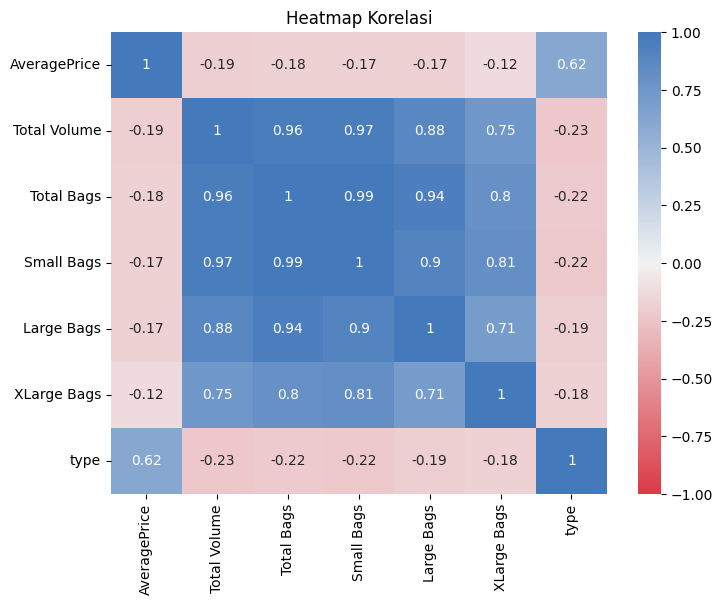

In [20]:
# Menghitung korelasi
corr = df2.corr()

# Membuat visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
warna = sns.diverging_palette(10, 250, as_cmap=True)

# Memetakan nilai korelasi di setiap sel
sns.heatmap(corr, annot=True, cmap=warna, vmin=-1, vmax=1)
plt.title("Heatmap Korelasi")
plt.show()

**Southeast**

In [21]:
#penjualan alpukat wilayah Southeast
df_organic_Southeast = df.loc[(df['type'] == 'organic') & (df['region'] == 'Southeast')].copy()
#statinarisasi data
df_organic_Southeast['stationary_data'] = np.log(df_organic_Southeast['Total Volume'])
data_southeast = df_organic_Southeast[['Date','stationary_data']]
#sorting berdasarkan tanggal
data_southeast = data_southeast.copy()
data_southeast['Date'] = pd.to_datetime(data_southeast['Date'])
result_southeast = data_southeast.sort_values(by='Date')
result_southeast.head()

,Date,stationary_data
11569,2015-01-04,10.217053
11568,2015-01-11,10.072836
11567,2015-01-18,10.155801
11566,2015-01-25,10.077832
11565,2015-02-01,10.465549


In [22]:
# merubah nama kolom karena untuk menggunakan prophet nama kolom harus ds dan y
result_southeast.columns = ('ds','y')
result_southeast.tail()

,ds,y
18157,2018-02-25,11.657111
18156,2018-03-04,11.717502
18155,2018-03-11,11.640086
18154,2018-03-18,11.694029
18153,2018-03-25,11.711099


**Boston**

In [23]:
#penjualan alpukat wilayah boston
df_organic_Boston = df.loc[(df['type'] == 'organic') & (df['region'] == 'Boston')].copy()
#statinarisasi data
df_organic_Boston['stationary_data'] = np.log(df_organic_Boston['Total Volume'])
data_boston = df_organic_Boston[['Date','stationary_data']]
#sorting berdasarkan tanggal
data_boston = data_boston.copy()
data_boston['Date'] = pd.to_datetime(data_boston['Date'])
result_boston = data_boston.sort_values(by='Date')
result_boston.head()

,Date,stationary_data
9385,2015-01-04,7.692629
9384,2015-01-11,7.704280
9383,2015-01-18,7.700449
9382,2015-01-25,7.574702
9381,2015-02-01,7.987474


In [24]:
# merubah nama kolom karena untuk menggunakan prophet nama kolom harus ds dan y
result_boston.columns = ('ds','y')
result_boston.tail()

,ds,y
17653,2018-02-25,10.359877
17652,2018-03-04,10.081242
17651,2018-03-11,10.324716
17650,2018-03-18,10.457657
17649,2018-03-25,10.556886


MiamiFtLauderdale

In [25]:
#penjualan alpukat wilayah MiamiFtLauderdale
df_organic_miami = df.loc[(df['type'] == 'organic') & (df['region'] == 'MiamiFtLauderdale')].copy()
#statinarisasi data
df_organic_miami['stationary_data'] = np.log(df_organic_miami['Total Volume'])
data_miami = df_organic_miami[['Date','stationary_data']]
#sorting berdasarkan tanggal
data_miami = data_miami.copy()
data_miami['Date'] = pd.to_datetime(data_miami['Date'])
result_miami = data_miami.sort_values(by='Date')
result_miami.head()

,Date,stationary_data
10425,2015-01-04,7.735626
10424,2015-01-11,7.386818
10423,2015-01-18,7.285760
10422,2015-01-25,7.407827
10421,2015-02-01,7.477208


In [26]:
# merubah nama kolom karena untuk menggunakan prophet nama kolom harus ds dan y
result_miami.columns = ('ds','y')
result_miami.tail()

,ds,y
17893,2018-02-25,9.289326
17892,2018-03-04,9.354410
17891,2018-03-11,8.980905
17890,2018-03-18,9.255162
17889,2018-03-25,9.061858


In [27]:
#penjualan alpukat wilayah MiamiFtLauderdale
df_organic_southcarolina = df.loc[(df['type'] == 'organic') & (df['region'] == 'SouthCarolina')].copy()
#statinarisasi data
df_organic_southcarolina['stationary_data'] = np.log(df_organic_southcarolina['Total Volume'])
data_southcarolina = df_organic_southcarolina[['Date','stationary_data']]
#sorting berdasarkan tanggal
data_southcarolina = data_southcarolina.copy()
data_southcarolina['Date'] = pd.to_datetime(data_southcarolina['Date'])
result_southcarolina = data_miami.sort_values(by='Date')
result_southcarolina.head()

,Date,stationary_data
10425,2015-01-04,7.735626
10424,2015-01-11,7.386818
10423,2015-01-18,7.285760
10422,2015-01-25,7.407827
10421,2015-02-01,7.477208


In [28]:
# merubah nama kolom karena untuk menggunakan prophet nama kolom harus ds dan y
result_miami.columns = ('ds','y')
result_miami.tail()

,ds,y
17893,2018-02-25,9.289326
17892,2018-03-04,9.354410
17891,2018-03-11,8.980905
17890,2018-03-18,9.255162
17889,2018-03-25,9.061858


# Modeling

Prophet

In [30]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
# membuat model
# menggunakan interval default yaitu 0.8 dan seasonality mode multiplicative karena menggunakan data bulanan
model = Prophet(interval_width=0.8, seasonality_mode='multiplicative')
model_fit_southeast = model.fit(result_southeast)
warnings.filterwarnings("ignore")

In [31]:
#forecasting southeast
future_southeast = model_fit_southeast.make_future_dataframe(periods=90)
forecast_southeast = model_fit_southeast.predict(future_southeast)
forecast_southeast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
254,2018-06-19,11.753277,11.713466,12.093728,11.728703,11.777377,0.012945,0.012945,0.012945,0.012945,0.012945,0.012945,0.0,0.0,0.0,11.905421
255,2018-06-20,11.754747,11.716032,12.106659,11.729821,11.779174,0.013724,0.013724,0.013724,0.013724,0.013724,0.013724,0.0,0.0,0.0,11.916074
256,2018-06-21,11.756217,11.728118,12.135979,11.730923,11.781207,0.014523,0.014523,0.014523,0.014523,0.014523,0.014523,0.0,0.0,0.0,11.926951
257,2018-06-22,11.757688,11.757325,12.141355,11.731765,11.783160,0.015326,0.015326,0.015326,0.015326,0.015326,0.015326,0.0,0.0,0.0,11.937883
258,2018-06-23,11.759158,11.750041,12.152604,11.732613,11.784963,0.016119,0.016119,0.016119,0.016119,0.016119,0.016119,0.0,0.0,0.0,11.948700


In [32]:
forecast_southeast[['ds','yhat']]

,ds,yhat
0,2015-01-04,10.333652
1,2015-01-11,10.342119
2,2015-01-18,10.326211
3,2015-01-25,10.307953
4,2015-02-01,10.304089
...,...,...
254,2018-06-19,11.905421
255,2018-06-20,11.916074
256,2018-06-21,11.926951
257,2018-06-22,11.937883


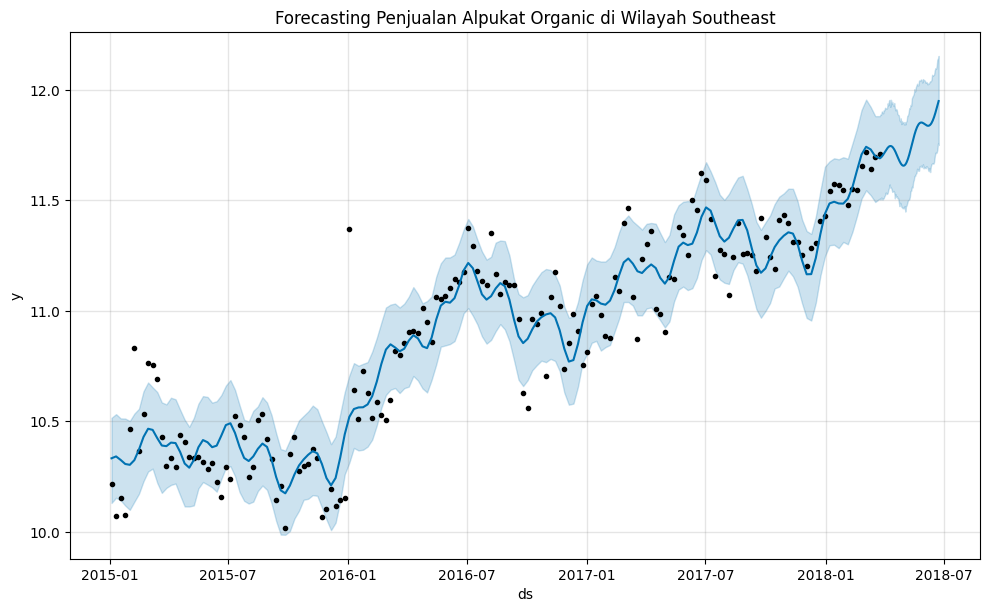

In [33]:
plot = model.plot(forecast_southeast)
plt.title('Forecasting Penjualan Alpukat Organic di Wilayah Southeast')
plot.show()

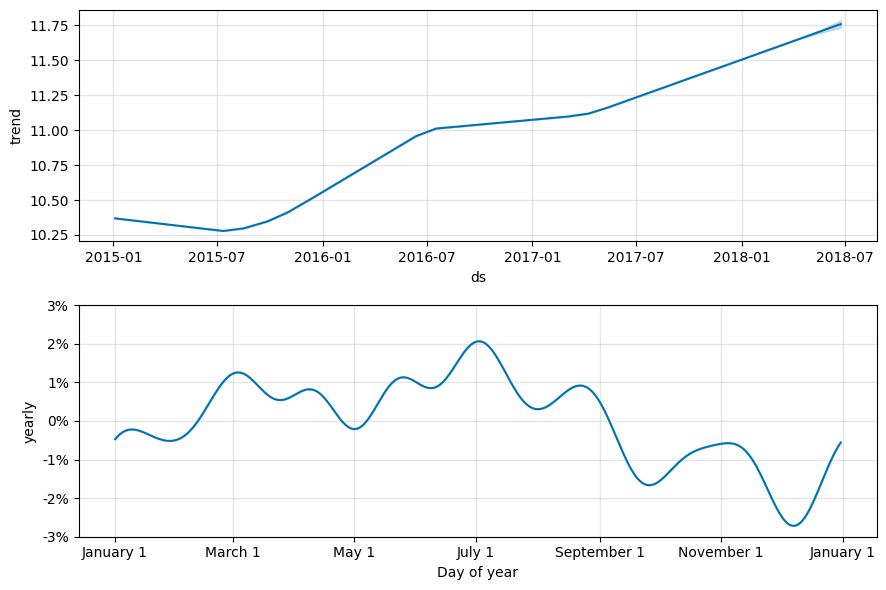

In [34]:
plot2 = model.plot_components(forecast_southeast)

In [35]:
import logging
import warnings

# Suppress information and debug messages
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# membuat model
# menggunakan interval default yaitu 0.8 dan seasonality mode multiplicative karena menggunakan data bulanan
model = Prophet(interval_width=0.8, seasonality_mode='multiplicative')
model_fit_boston = model.fit(result_boston)
# Optionally, you can suppress warnings as well
warnings.filterwarnings("ignore")

In [36]:
#forecasting boston
future_boston = model_fit_boston.make_future_dataframe(periods=90)
forecast_boston = model_fit_boston.predict(future_boston)
forecast_boston.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
254,2018-06-19,10.495564,10.177296,10.692386,10.464084,10.530470,-0.006562,-0.006562,-0.006562,-0.006562,-0.006562,-0.006562,0.0,0.0,0.0,10.426693
255,2018-06-20,10.496904,10.178303,10.669799,10.464683,10.532521,-0.006971,-0.006971,-0.006971,-0.006971,-0.006971,-0.006971,0.0,0.0,0.0,10.423730
256,2018-06-21,10.498244,10.167812,10.677331,10.465236,10.534664,-0.007291,-0.007291,-0.007291,-0.007291,-0.007291,-0.007291,0.0,0.0,0.0,10.421699
257,2018-06-22,10.499584,10.166471,10.697982,10.465894,10.537524,-0.007521,-0.007521,-0.007521,-0.007521,-0.007521,-0.007521,0.0,0.0,0.0,10.420621
258,2018-06-23,10.500924,10.168782,10.673052,10.466367,10.539415,-0.007658,-0.007658,-0.007658,-0.007658,-0.007658,-0.007658,0.0,0.0,0.0,10.420508


In [37]:
forecast_boston[['ds','yhat']]

,ds,yhat
0,2015-01-04,7.630465
1,2015-01-11,7.669458
2,2015-01-18,7.703155
3,2015-01-25,7.733333
4,2015-02-01,7.761103
...,...,...
254,2018-06-19,10.426693
255,2018-06-20,10.423730
256,2018-06-21,10.421699
257,2018-06-22,10.420621


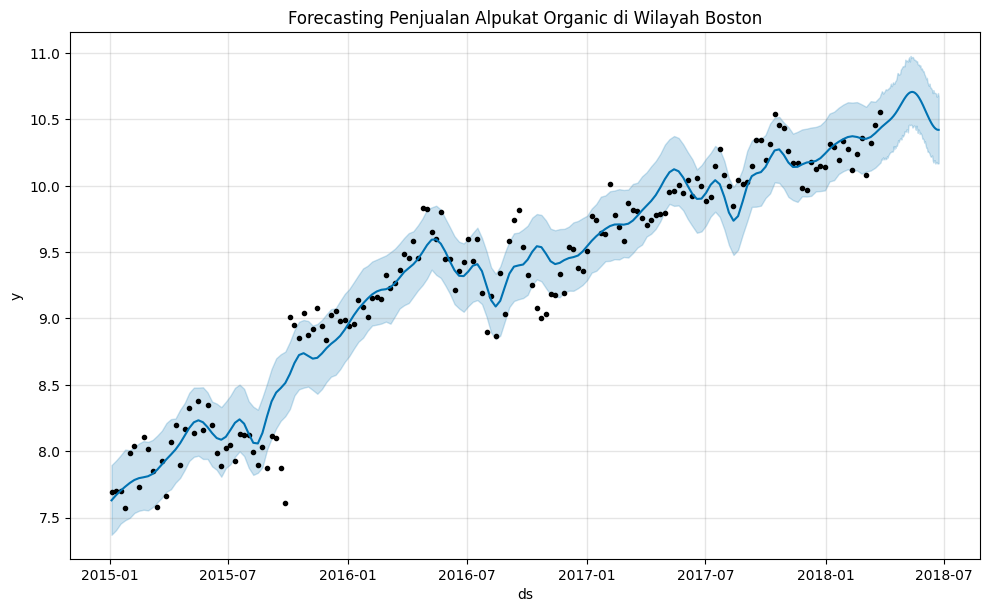

In [38]:
plot_boston = model.plot(forecast_boston)
plt.title('Forecasting Penjualan Alpukat Organic di Wilayah Boston')
plot_boston.show()

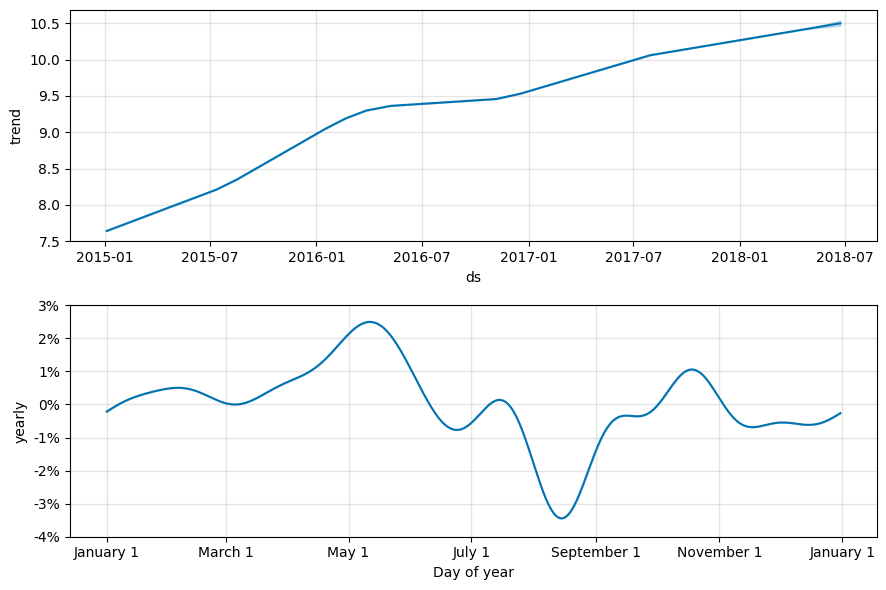

In [39]:
plot2 = model.plot_components(forecast_boston)

In [40]:
import logging
import warnings

# Suppress information and debug messages
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# membuat model
# menggunakan interval default yaitu 0.8 dan seasonality mode multiplicative karena menggunakan data bulanan
model = Prophet(interval_width=0.8, seasonality_mode='multiplicative')
model_fit_miami = model.fit(result_miami)
# Optionally, you can suppress warnings as well
warnings.filterwarnings("ignore")

In [41]:
#forecasting miami
future_miami = model_fit_miami.make_future_dataframe(periods=90)
forecast_miami = model_fit_miami.predict(future_miami)
forecast_miami.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
254,2018-06-19,8.979364,8.628602,9.939315,8.978973,8.979780,0.034066,0.034066,0.034066,0.034066,0.034066,0.034066,0.0,0.0,0.0,9.285256
255,2018-06-20,8.980814,8.668091,9.921121,8.980414,8.981237,0.033536,0.033536,0.033536,0.033536,0.033536,0.033536,0.0,0.0,0.0,9.281994
256,2018-06-21,8.982264,8.612556,9.891681,8.981852,8.982693,0.033119,0.033119,0.033119,0.033119,0.033119,0.033119,0.0,0.0,0.0,9.279747
257,2018-06-22,8.983713,8.693548,9.914008,8.983290,8.984148,0.032809,0.032809,0.032809,0.032809,0.032809,0.032809,0.0,0.0,0.0,9.278462
258,2018-06-23,8.985163,8.699742,9.884659,8.984728,8.985604,0.032597,0.032597,0.032597,0.032597,0.032597,0.032597,0.0,0.0,0.0,9.278049


In [42]:
forecast_miami[['ds','yhat']]

,ds,yhat
0,2015-01-04,7.655845
1,2015-01-11,7.637691
2,2015-01-18,7.491202
3,2015-01-25,7.383632
4,2015-02-01,7.408180
...,...,...
254,2018-06-19,9.285256
255,2018-06-20,9.281994
256,2018-06-21,9.279747
257,2018-06-22,9.278462


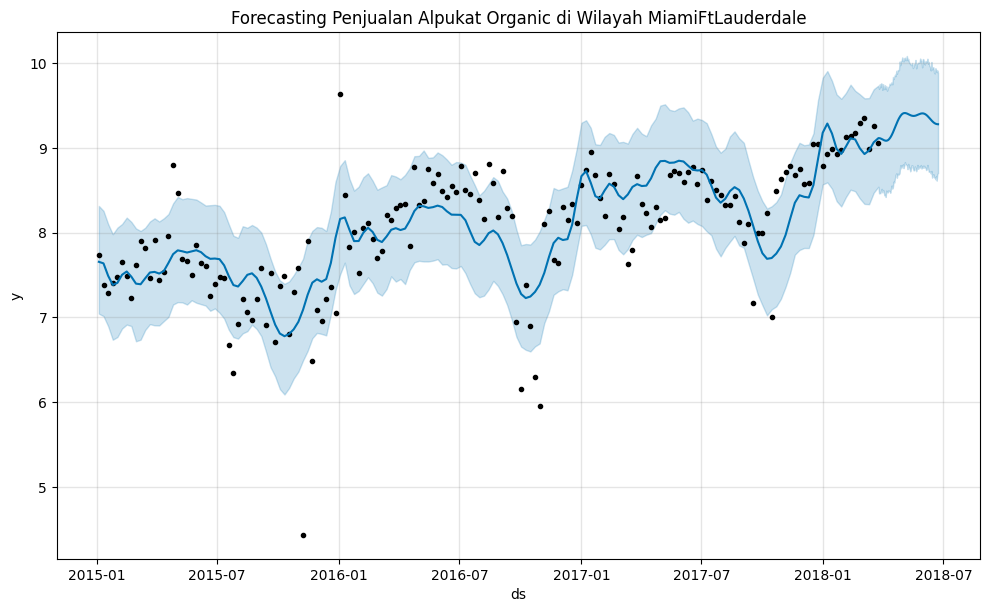

In [43]:
plot_miami = model.plot(forecast_miami)
plt.title('Forecasting Penjualan Alpukat Organic di Wilayah MiamiFtLauderdale')
plot_miami.show()

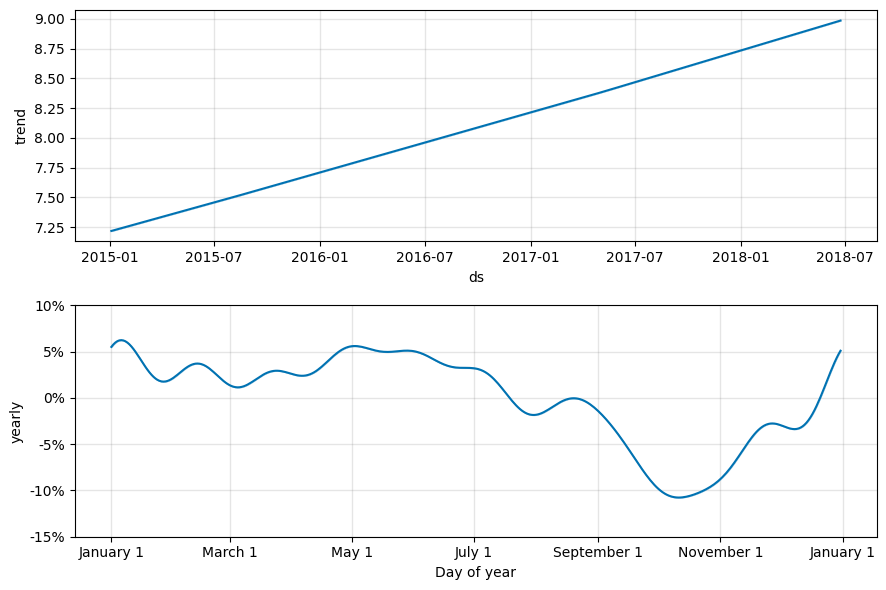

In [44]:
plot2_miami = model.plot_components(forecast_miami)

cek slope

In [48]:
from sklearn.linear_model import LinearRegression

# Gabungkan dua dataframe berdasarkan kolom yang sesuai, misalnya kolom tanggal ('ds')
merged_data = pd.merge(df_organic_Southeast, forecast_southeast, how='inner', left_on='Date', right_on='ds')

# Persiapkan data untuk variabel independen (X) dan dependen (Y)
X = merged_data['Total Volume'].values.reshape(-1, 1)
Y = merged_data['yhat'].values

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X, Y)

# Mendapatkan slope (koefisien regresi)
slope = model.coef_[0]

print('Slope dari tren : ', slope)

Slope dari tren :  0.8947906551555291


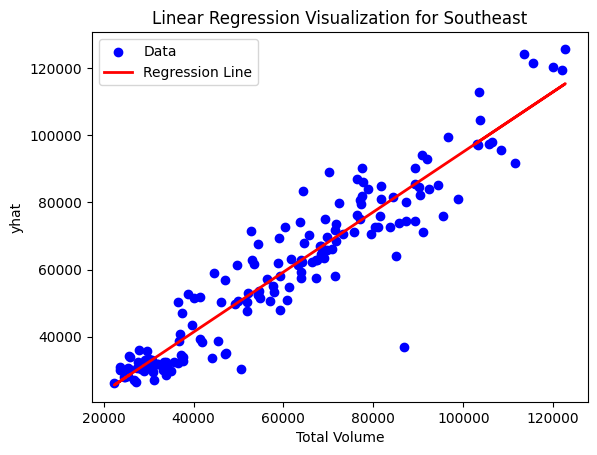

In [49]:
# Visualisasi hasil
plt.scatter(merged_data['Total Volume'], merged_data['yhat'], color='blue', label='Data')
plt.plot(merged_data['Total Volume'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Visualization for Southeast')
plt.xlabel('Total Volume')
plt.ylabel('yhat')
plt.legend()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

# Gabungkan dua dataframe berdasarkan kolom yang sesuai, misalnya kolom tanggal ('ds')
merged_data = pd.merge(df_organic_Boston, forecast_boston, how='inner', left_on='Date', right_on='ds')

# Persiapkan data untuk variabel independen (X) dan dependen (Y)
X = merged_data['Total Volume'].values.reshape(-1, 1)
Y = merged_data['yhat'].values

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X, Y)

# Mendapatkan slope (koefisien regresi)
slope = model.coef_[0]

print('Slope dari tren : ', slope)

Slope dari tren :  0.9226425977045092


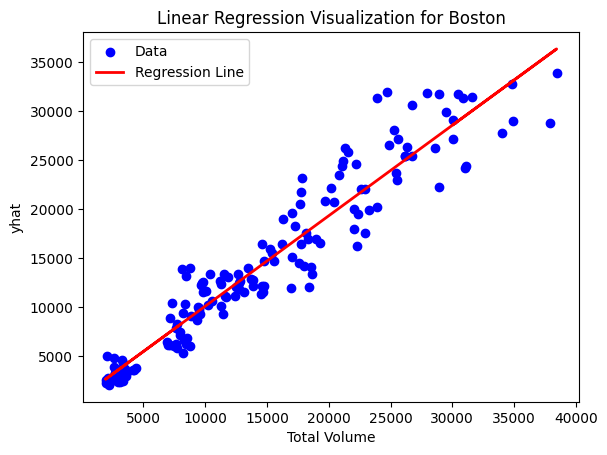

In [51]:
# Visualisasi hasil
plt.scatter(merged_data['Total Volume'], merged_data['yhat'], color='blue', label='Data')
plt.plot(merged_data['Total Volume'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Visualization for Boston')
plt.xlabel('Total Volume')
plt.ylabel('yhat')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Gabungkan dua dataframe berdasarkan kolom yang sesuai, misalnya kolom tanggal ('ds')
merged_data = pd.merge(df_organic_miami, forecast_miami, how='inner', left_on='Date', right_on='ds')

# Persiapkan data untuk variabel independen (X) dan dependen (Y)
X = merged_data['Total Volume'].values.reshape(-1, 1)
Y = merged_data['yhat'].values

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X, Y)

# Mendapatkan slope (koefisien regresi)
slope = model.coef_[0]

print('Slope dari tren : ', slope)

Slope dari tren :  0.6390348214285441


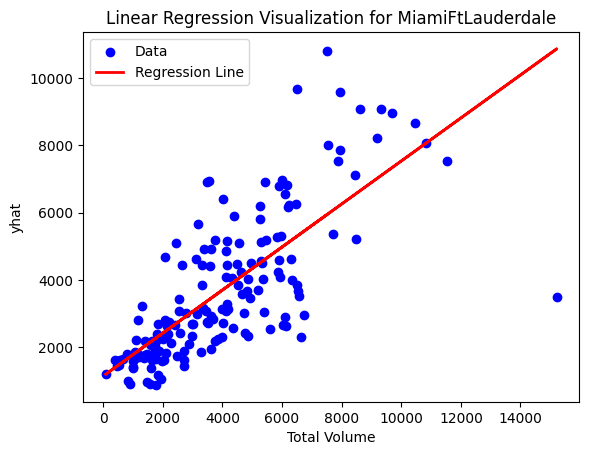

In [ ]:
# Visualisasi hasil
plt.scatter(merged_data['Total Volume'], merged_data['yhat'], color='blue', label='Data')
plt.plot(merged_data['Total Volume'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Visualization for MiamiFtLauderdale')
plt.xlabel('Total Volume')
plt.ylabel('yhat')
plt.legend()
plt.show()

Evaluaion Model

In [52]:
# Kembalikan nilai dari log ke skala aslinya
forecast_southeast['yhat'] = np.exp(forecast_southeast['yhat'])
forecast_southeast['yhat_lower'] = np.exp(forecast_southeast['yhat_lower'])
forecast_southeast['yhat_upper'] = np.exp(forecast_southeast['yhat_upper'])

In [53]:
# Kembalikan nilai dari log ke skala aslinya
forecast_boston['yhat'] = np.exp(forecast_boston['yhat'])
forecast_boston['yhat_lower'] = np.exp(forecast_boston['yhat_lower'])
forecast_boston['yhat_upper'] = np.exp(forecast_boston['yhat_upper'])

In [54]:
# Kembalikan nilai dari log ke skala aslinya
forecast_miami['yhat'] = np.exp(forecast_miami['yhat'])
forecast_miami['yhat_lower'] = np.exp(forecast_miami['yhat_lower'])
forecast_miami['yhat_upper'] = np.exp(forecast_miami['yhat_upper'])

In [60]:
result_evaluation = cross_validation(model_fit_southeast,
                                     horizon='90 days',
                                     period='365 days',
                                     initial='900 days')

# Calculate performance metric
result_perform_southeast = performance_metrics(result_evaluation)

# Display performance metrics
result_perform_southeast

  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,0.000279,0.016695,0.016695,0.001461,0.001461,0.001460,1.0
1,13 days,0.004020,0.063406,0.063406,0.005493,0.005493,0.005508,1.0
2,20 days,0.009697,0.098473,0.098473,0.008508,0.008508,0.008544,1.0
3,27 days,0.009790,0.098946,0.098946,0.008553,0.008553,0.008590,1.0
4,34 days,0.003821,0.061817,0.061817,0.005355,0.005355,0.005369,1.0
5,41 days,0.002084,0.045651,0.045651,0.003977,0.003977,0.003969,1.0
6,48 days,0.002002,0.044747,0.044747,0.003874,0.003874,0.003867,1.0
7,55 days,0.017201,0.131152,0.131152,0.011357,0.011357,0.011293,1.0
8,62 days,0.009330,0.096592,0.096592,0.008286,0.008286,0.008252,1.0
9,69 days,0.004891,0.069938,0.069938,0.005969,0.005969,0.005951,1.0


In [61]:
result_evaluation = cross_validation(model_fit_boston,
                                     horizon='90 days',
                                     period='365 days',
                                     initial='900 days')

# Calculate performance metrics
result_perform_boston = performance_metrics(result_evaluation)

# Display performance metrics
result_perform_boston

  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,0.082179,0.286669,0.286669,0.028278,0.028278,0.027884,0.0
1,13 days,0.035103,0.187358,0.187358,0.018169,0.018169,0.018005,1.0
2,20 days,0.070888,0.266247,0.266247,0.025872,0.025872,0.025541,0.0
3,27 days,0.166261,0.407751,0.407751,0.040005,0.040005,0.039220,0.0
4,34 days,0.091011,0.301681,0.301681,0.029185,0.029185,0.028765,0.0
5,41 days,0.161830,0.402280,0.402280,0.039160,0.039160,0.038408,0.0
6,48 days,0.345937,0.588164,0.588164,0.058144,0.058144,0.056501,0.0
7,55 days,0.228358,0.477868,0.477868,0.046673,0.046673,0.045609,0.0
8,62 days,0.123405,0.351291,0.351291,0.033909,0.033909,0.033343,0.0
9,69 days,0.377946,0.614773,0.614773,0.060982,0.060982,0.059177,0.0


In [62]:
result_evaluation = cross_validation(model_fit_miami,
                                     horizon='90 days',
                                     period='365 days',
                                     initial='900 days')

# Calculate performance metrics
result_perform_miami = performance_metrics(result_evaluation)

# Display performance metrics
result_perform_miami

  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,0.267608,0.517308,0.517308,0.058903,0.058903,0.057218,1.0
1,13 days,0.251669,0.501666,0.501666,0.056227,0.056227,0.054690,1.0
2,20 days,0.074267,0.272519,0.272519,0.030341,0.030341,0.029888,1.0
3,27 days,0.004539,0.067370,0.067370,0.007544,0.007544,0.007516,1.0
4,34 days,0.006400,0.079997,0.079997,0.008916,0.008916,0.008956,1.0
5,41 days,0.023041,0.151793,0.151793,0.016633,0.016633,0.016772,1.0
6,48 days,0.004574,0.067634,0.067634,0.007400,0.007400,0.007427,1.0
7,55 days,0.022294,0.149311,0.149311,0.016270,0.016270,0.016403,1.0
8,62 days,0.171718,0.414389,0.414389,0.044609,0.044609,0.045627,1.0
9,69 days,0.324515,0.569662,0.569662,0.060898,0.060898,0.062810,0.0


In [ ]:
eval = pd.read_csv('dataset/Dataset Eval Analyze green horizon.csv')
eval

,region,mse,rmse
0,Southeast,0.000048,0.006937
1,MiamiFtLauderdale,0.002128,0.046134
2,Boston,0.024558,0.156709


hitung perform forecast

In [ ]:
total_volume_sebelumnya_southeast = df_organic_Southeast['Total Volume'].sum()  # Gantilah dengan data volume yang sesuai

# Contoh data hasil forecasting untuk 3 bulan berikutnya
total_volume_southeast = forecast_southeast['yhat'].sum()  # Gantilah dengan total volume hasil forecasting yang sesuai

# Hitung peningkatan persentase
peningkatan_persentase_southeast = ((total_volume_southeast - total_volume_sebelumnya_southeast) / total_volume_sebelumnya_southeast) * 100

print(f'Peningkatan Persentase diwilayah Southeast: {peningkatan_persentase_southeast:.2f}%')

Peningkatan Persentase diwilayah Southeast: 115.34%


In [ ]:
total_volume_sebelumnya_boston = df_organic_Boston['Total Volume'].sum()  # Gantilah dengan data volume yang sesuai

# Contoh data hasil forecasting untuk 3 bulan berikutnya
total_volume_boston = forecast_boston['yhat'].sum()  # Gantilah dengan total volume hasil forecasting yang sesuai

# Hitung peningkatan persentase
peningkatan_persentase_boston = ((total_volume_boston - total_volume_sebelumnya_boston) / total_volume_sebelumnya_boston) * 100

print(f'Peningkatan Persentase diwilayah Boston: {peningkatan_persentase_boston:.2f}%')

Peningkatan Persentase diwilayah Boston: 145.87%


In [ ]:
total_volume_sebelumnya_miami = df_organic_miami['Total Volume'].sum()  # Gantilah dengan data volume yang sesuai

# Contoh data hasil forecasting untuk 3 bulan berikutnya
total_volume_miami = forecast_miami['yhat'].sum()  # Gantilah dengan total volume hasil forecasting yang sesuai

# Hitung peningkatan persentase
peningkatan_persentase_miami = ((total_volume_miami - total_volume_sebelumnya_miami) / total_volume_sebelumnya_miami) * 100

print(f'Peningkatan Persentase diwilayah MiamiFtLauderdale: {peningkatan_persentase_miami:.2f}%')

Peningkatan Persentase diwilayah MiamiFtLauderdale: 142.23%


In [ ]:
tvs = total_volume_sebelumnya_southeast + total_volume_sebelumnya_boston + total_volume_sebelumnya_miami
tvf3w = total_volume_southeast + total_volume_boston + total_volume_miami
hf = tvf3w - tvs
# Hitung peningkatan persentase global
peningkatan_persentase_global = hf / tvs * 100
print(f'Peningkatan Persentase keseluruhan : {peningkatan_persentase_global:.2f}%')

Peningkatan Persentase keseluruhan : 122.24%
